## Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

## Importar algoritmo SVM desde cero

In [2]:
%run "Algoritmo SVM.ipynb"

## Creación de dataset de prueba

- Se crean datos de prueba compuesto por dos cúmulos de puntos.
    - Se crean 500 puntos en total.
    - Cada punto está compuesto por dos componentes.
    - Se tiene dos clases, una por cada cúmulo.

- Se normalizan los datos.
- Se separan en conjunto de entrenamiento y de prueba.

In [3]:
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.05, random_state=40)
# Normalización de datos
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Separación en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Gráfico del dataset

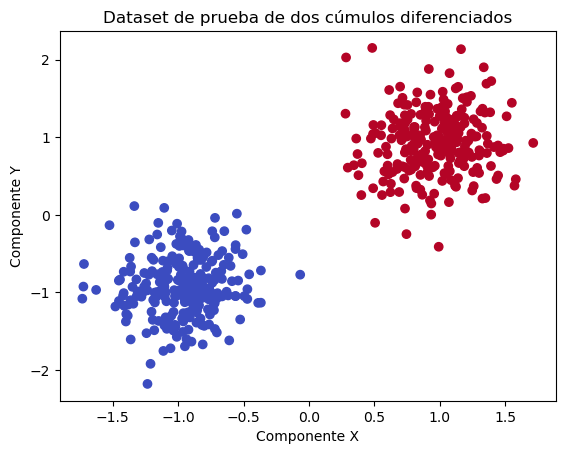

In [4]:
plt.scatter(X[:,0], X[:, 1], c = y, cmap=plt.cm.coolwarm)
plt.title("Dataset de prueba de dos cúmulos diferenciados")
plt.xlabel("Componente X")
plt.ylabel("Componente Y")
plt.savefig("images/dataset_prueba.svg")
plt.show()

## Implementación de SVM Lineal desde cero
- Se crea instancia de la clase SVM implementada.
- Se ajustan los pesos del hiperplano con el conjunto de entrenamiento.
- Se realizan predicciones sobre conjunto de prueba.

In [5]:
svm = SVM()
svm.fit(X_train, y_train)
predicciones_svm = svm.predict(X_test)

### Cálculo de *accuracy* de *test*

In [6]:
print("Accuracy de clasificación en conjunto de prueba:", accuracy(y_test, predicciones_svm))

Accuracy de clasificación en conjunto de prueba: 100.0%


### Gráfico de clasificaciones en conjunto de prueba

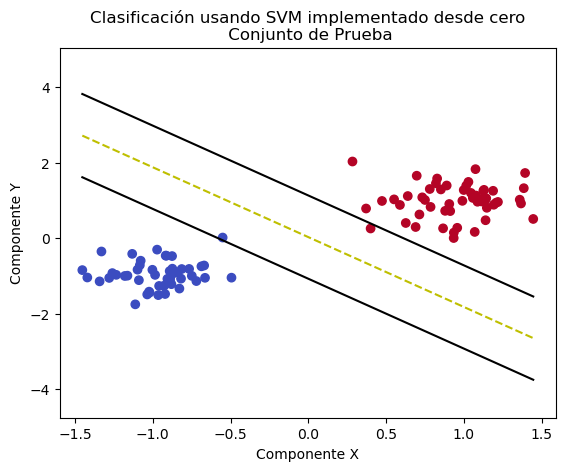

In [7]:
visualize_svm(X_test, y_test, svm.w, svm.b, "Clasificación usando SVM implementado desde cero\n Conjunto de Prueba", "Componente X", "Componente Y", "blobs_desde_cero")

## Implementación de SVM Lineal con Scikit-Learn

- Se crea instancia de la clase LinearSVC, clase de scikit-learn con implementacion de SVM lineal para clasificación.
- Se ajustan los pesos del hiperplano con el conjunto de entrenamiento.
- Se realizan predicciones sobre conjunto de prueba.

In [8]:
svm_sk = LinearSVC(C=1, loss="hinge")
svm_sk.fit(X_train, y_train)
predicciones_sk = svm_sk.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### Cálculo de *accuracy* de *test*

In [9]:
print("Accuracy de clasificación en conjunto de prueba:", accuracy(y_test, predicciones_sk))

Accuracy de clasificación en conjunto de prueba: 100.0%


### Gráfico de clasificaciones en conjunto de prueba

- Se extraen los pesos del modelo entrenado desde sus variables de clase *coef_* y *intercept_*.
    - *coef_* corresponde a las pendientes del hiperplano.
    - *intercept_* corresponde a las constantes que determinan donde el hiperplano se intersecta con los ejes.
- Se grafican las clasificaciones y la división realizada por el hiperplano.

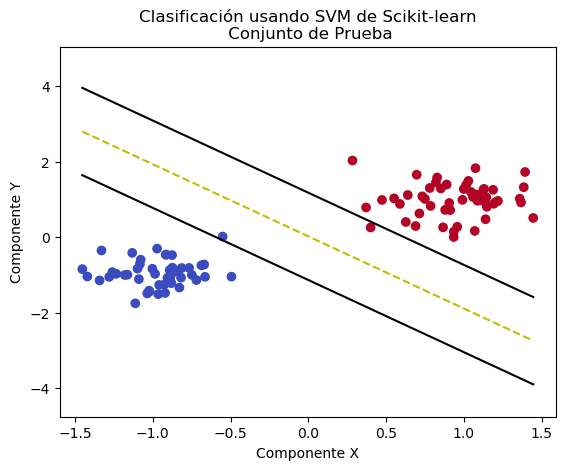

In [10]:
w = svm_sk.coef_[0]
b = svm_sk.intercept_
visualize_svm(X_test, y_test, w, -b, "Clasificación usando SVM de Scikit-learn\n Conjunto de Prueba", "Componente X", "Componente Y", "blobs_sk")

# Importación dataset Iris

- Se importa el *dataset Iris* desde scikit-learn.
- Se extraen dos *features* para facilitar la visualización: el ancho y el largo de pétalo.
- Se agrupan la especies *Iris virginica* y *Iris versicolor* en una misma etiqueta para hacer clasificación binaria, diferenciandolas de *Iris setosa*.
- Se normalizan los datos.
- Se separa el *dataset* en conjunto de entrenamiento y de prueba.

In [11]:
iris = datasets.load_iris()

# Extracción de ancho y largo de pétalo
X = iris["data"][:, (2, 3)]
# Agrupación de especies *Iris virginica* y *Iris versicolor* en una misma etiqueta 
y = (iris["target"] == 0).astype(np.float64) # Iris-Virginica
# Normalización de datos
scaler = StandardScaler();
X = scaler.fit_transform(X)
# Separación en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Implementación de SVM manual

In [12]:
svm = SVM()
svm.fit(X_train, y_train)
predicciones_svm = svm.predict(X_test)

### Cálculo de *accuracy* de *test*

In [13]:
print("Accuracy de clasificación en conjunto de prueba:", accuracy(y_test, predicciones_svm))

Accuracy de clasificación en conjunto de prueba: 100.0%


### Gráfico de clasificaciones en conjunto de prueba

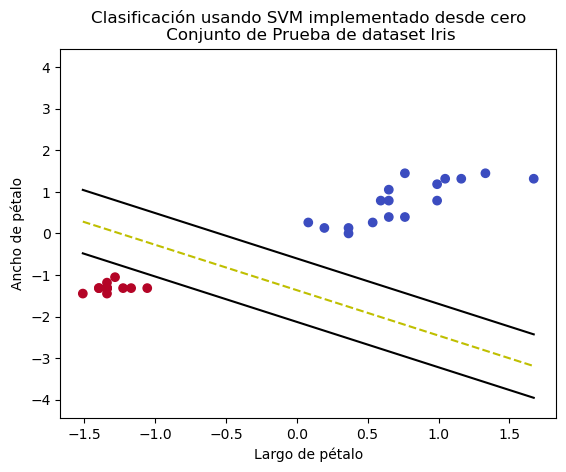

In [14]:
visualize_svm(X_test, y_test, svm.w, svm.b, "Clasificación usando SVM implementado desde cero\n Conjunto de Prueba de dataset Iris", "Largo de pétalo", "Ancho de pétalo", "iris_desde_cero")

## Implementación de SVM Lineal con Scikit-Learn

In [15]:
from sklearn.svm import LinearSVC
svm_sk = LinearSVC(C=1, loss="hinge")#SVC(kernel='linear')
svm_sk.fit(X_train, y_train)
predicciones_sk = svm_sk.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### Cálculo de *accuracy* de *test*

In [16]:
print("Accuracy de clasificación en conjunto de prueba:", accuracy(y_test, predicciones_sk))

Accuracy de clasificación en conjunto de prueba: 100.0%


### Gráfico de clasificaciones en conjunto de prueba

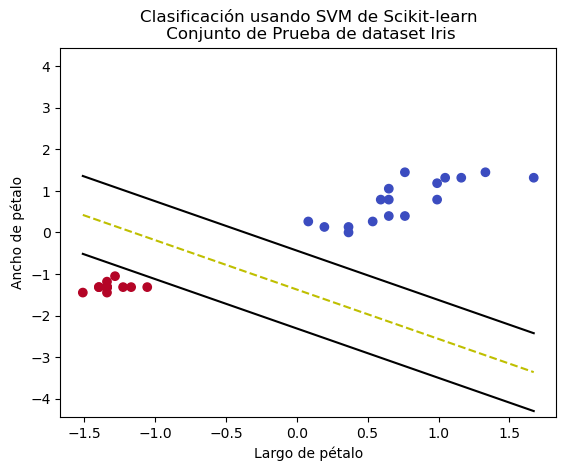

In [17]:
w = svm_sk.coef_[0]
b = svm_sk.intercept_
visualize_svm(X_test, y_test, w, -b, "Clasificación usando SVM de Scikit-learn\n Conjunto de Prueba de dataset Iris", "Largo de pétalo", "Ancho de pétalo", "iris_sk")